In [2]:
import sys, os
sys.path.append(os.path.join('..', 'scripts'))
import figure_utils as utils
import lif_utils

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import pandas as pd
import pytry
import os.path

In [23]:
def get_data(data_frame):
    regret = np.vstack(data_frame['regret'].values)
    cum_regret = np.cumsum(regret, axis=1)
    avg_regret = np.zeros(cum_regret.shape)
    for i in range(avg_regret.shape[0]):
        avg_regret[i,:] = np.divide(cum_regret[i,:],
                                    np.arange(1,regret.shape[1]+1))
    if 'times' in data_frame.columns:
        time = np.vstack(data_frame['times'].values) * 1e-9
    else:
        time = np.vstack(data_frame['elapsed_time'].values) * 1e-9
    return regret, avg_regret, time

def get_dict_data(data_frame):
    regret = data_frame['regret']
    cum_regret = np.cumsum(regret)
    avg_regret = np.divide(cum_regret, np.arange(1, regret.shape[0] + 1))
    if 'times' in data_frame:
        time = data_frame['times'] * 1e-9
    else:
        time = data_frame['elapsed_time'] * 1e-9
    return regret, avg_regret, time

def get_stats(data):
    (num_trials, _) = data.shape
    return np.mean(data, axis=0), np.std(data, axis=0) * 1.96 / np.sqrt(num_trials)

def extract_data(dir_name):
    alg_data = pytry.read(dir_name)
    alg_regret, avg_alg_regret, alg_time = zip(*[get_dict_data(f) for f in alg_data])
    
    alg_regret = np.array(alg_regret).squeeze()
    avg_alg_regret = np.array(avg_alg_regret).squeeze()
    alg_time = np.array(alg_time).squeeze()
    
    avg_alg_regret_mu, avg_alg_regret_ste = get_stats(avg_alg_regret)
    time_mu, time_ste = get_stats(alg_time)
    
    num_trials, budget = alg_regret.shape
    return {'regret':alg_regret, 
            'time':alg_time, 
            'regret_mu':avg_alg_regret_mu, 
            'regret_ste':avg_alg_regret_ste,
            'time_mu':time_mu,
            'time_ste':time_ste,
            'budget':budget}

In [30]:
title_case = {'gp-matern':'GP-BO Matern', 'ssp-hex':'SSP-BO Hex'}

In [40]:
def plot_fig(alg_stats, func_name):
    fig, (ax1, ax2) = plt.subplots(1,
                                   2,
                                   figsize=(5.75, 2.1),
                                   gridspec_kw={
                                       "wspace": 0.3,
                                       "width_ratios": [1, 1]
                                   })


    
    line_styles = {0:'solid', 1:'dashed', 2:'dotted', 3:'dashdot'}
    # Figure 1.a - Regret performance
    for idx, (k, v) in enumerate(alg_stats.items()):
        
        budget = v['budget']
        regret_steps = range(1, budget+1)

        avg_regret_mu = v['regret_mu']
        avg_regret_ste = v['regret_ste']
        ax1.fill_between(regret_steps[:-10],
                         (avg_regret_mu - avg_regret_ste)[10:],
                         (avg_regret_mu + avg_regret_ste)[10:], alpha=0.3)
        ax1.plot(regret_steps[:-10], avg_regret_mu[10:], label=title_case[k], ls=line_styles[idx])
        

    
    
        ax1.legend(loc="upper center", ncol=1, bbox_to_anchor=(0.5, 1.05), columnspacing=1.0, handlelength=2, handletextpad=0.5)

        ax1.set_ylabel('Average Regret (a.u.)')
        ax1.set_xlabel('Sample Number ($n$)')
        ax1.set_title(f'Average Regret')

    # Figure 1.b - Time performance
    for idx, (k, v) in enumerate(alg_stats.items()):
    
        budget = v['budget']
        regret_steps = range(1, budget+1)

        time_mu = v['time_mu']
        time_ste = v['time_ste']
        ax2.fill_between(regret_steps[:-10],
                         time_mu - time_ste,
                         time_mu + time_ste, alpha=0.3)
        ax2.plot(regret_steps[:-10], time_mu, label=title_case[k], ls=line_styles[idx])
        

    
    
        ax2.legend(loc="upper center", ncol=1, bbox_to_anchor=(0.5, 1.05), columnspacing=1.0, handlelength=2, handletextpad=0.5)

        ax2.set_ylabel('Elapsed Time (sec)')
        ax2.set_xlabel('Sample Number ($n$)')
        ax2.set_title(f'Next Sample Computation Time')
            
    utils.save(fig, f"ssp_bo_{func_name}_figure.pdf")

Saving to ssp_bo_himmelblau_figure.large.pdf
Extracting bounding box of file ssp_bo_himmelblau_figure.large.pdf
Optimising PDF and saving to ssp_bo_himmelblau_figure.pdf
Saving to ssp_bo_branin-hoo_figure.large.pdf
Extracting bounding box of file ssp_bo_branin-hoo_figure.large.pdf
Optimising PDF and saving to ssp_bo_branin-hoo_figure.pdf
Saving to ssp_bo_goldstein-price_figure.large.pdf
Extracting bounding box of file ssp_bo_goldstein-price_figure.large.pdf
Optimising PDF and saving to ssp_bo_goldstein-price_figure.pdf


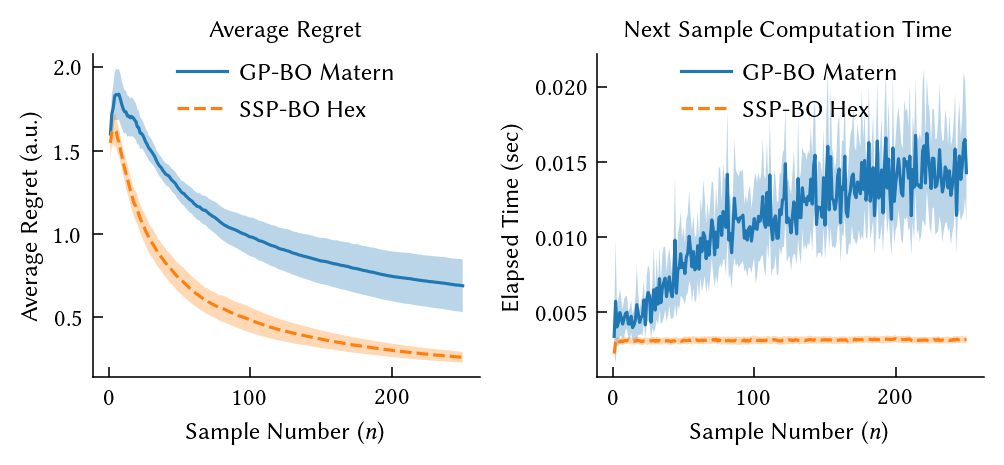

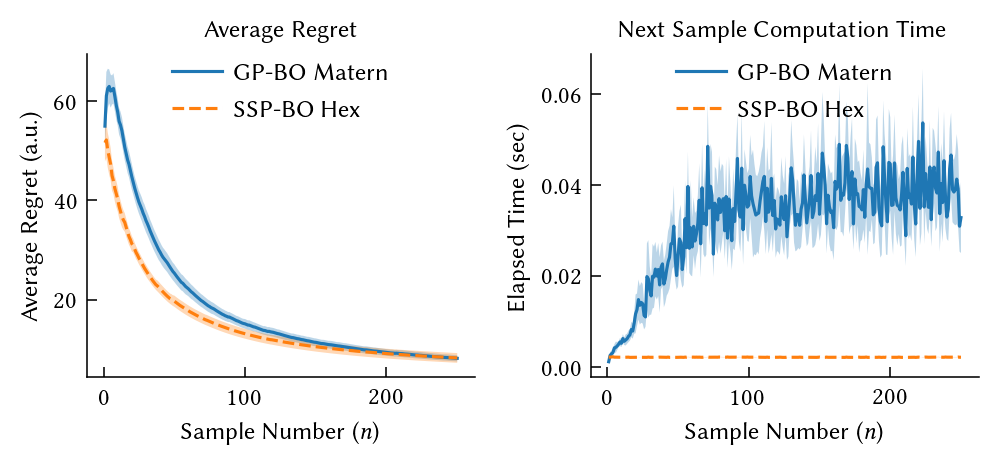

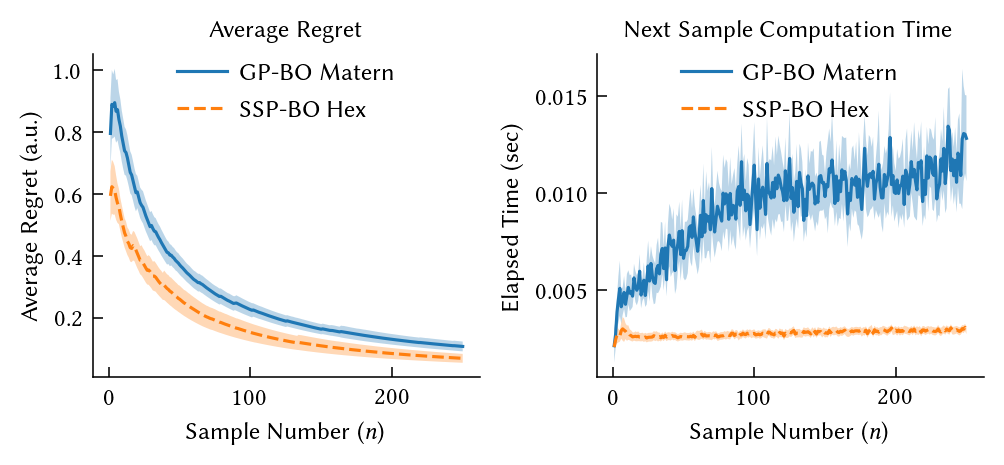

In [41]:
######## Load Data ##########


func_names = ['himmelblau', 'branin-hoo', 'goldstein-price']
algs = ['gp-matern', 'ssp-hex']

for func_name in func_names:
    alg_stats = {}
    for a in algs:
        alg_stats[a] = extract_data(f'../data/ssp-bo/{func_name}/{a}')
    plot_fig(alg_stats, func_name)
